#### Putting It All Together

As you might have guessed from the last notebook, using all of the variables was allowing you to drastically overfit the training data.  This was great for looking good in terms of your Rsquared on these points.  However, this was not great in terms of how well you were able to predict on the test data.

We will start where we left off in the last notebook.  First read in the dataset.

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./loan_approval_dataset.csv')
df.head(25)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [151]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


Question 1
1. Provide the number of rows and columns in this dataset.

In [152]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print (f"Number of rows {num_rows}")
print (f"Number of columns {num_cols}")

Number of rows 4269
Number of columns 13


Question 2

2. Which columns had no missing values? Provide a set of column names that have no missing values.

In [153]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.

no_nulls

{' bank_asset_value',
 ' cibil_score',
 ' commercial_assets_value',
 ' education',
 ' income_annum',
 ' loan_amount',
 ' loan_status',
 ' loan_term',
 ' luxury_assets_value',
 ' no_of_dependents',
 ' residential_assets_value',
 ' self_employed',
 'loan_id'}

 education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64


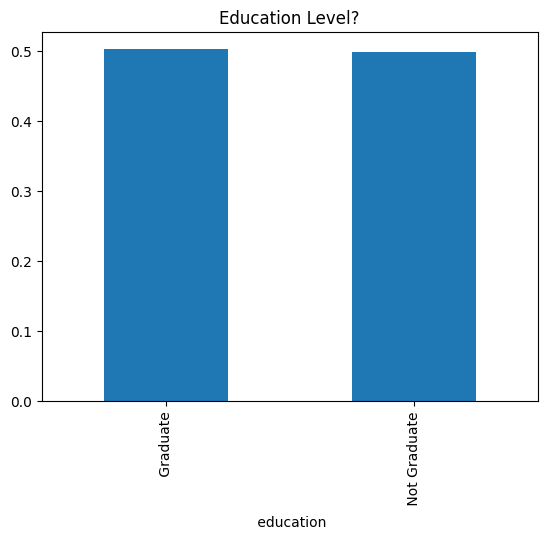

In [154]:
print(df[' education'].value_counts())
status_vals=df[' education'].value_counts()
(status_vals/df.shape[0]).plot(kind="bar");
plt.title("Education Level?");

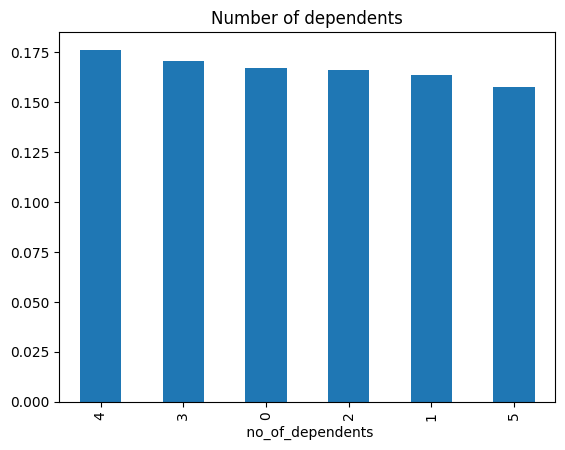

In [141]:
status_vals=df[' no_of_dependents'].value_counts()
(status_vals/df.shape[0]).plot(kind="bar");
plt.title("Number of dependents");

In [111]:
print("Count of students ->",
      df[(df[' cibil_score'] > 299) &
                (df[' cibil_score'] < 580)].count())
 
# dataframe of above result
dfs=df[(df[' cibil_score'] > 299) &
                (df[' cibil_score'] < 580)]
dfs.head(50)

Count of students -> loan_id                      1983
 no_of_dependents            1983
 education                   1983
 self_employed               1983
 income_annum                1983
 loan_amount                 1983
 loan_term                   1983
 cibil_score                 1983
 residential_assets_value    1983
 commercial_assets_value     1983
 luxury_assets_value         1983
 bank_asset_value            1983
 loan_status                 1983
dtype: int64


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected
10,11,4,Graduate,Yes,2900000,11200000,2,547,8100000,4700000,9500000,3100000,Approved
11,12,2,Not Graduate,Yes,6700000,22700000,18,538,15300000,5800000,20400000,6400000,Rejected
12,13,3,Not Graduate,Yes,5000000,11600000,16,311,6400000,9600000,14600000,4300000,Rejected


In [112]:

def plot_credit_scores(data_frame):
    # Define the FICO credit score ranges and their corresponding types
    fico_ranges = {
        (300, 579): "Very Poor",
        (580, 669): "Fair",
        (670, 739): "Good",
        (740, 799): "Very Good",
        (800, 850): "Exceptional"
    }

    # Categorize the credit scores based on the FICO ranges
    def categorize_fico_score(score):
        for range_min, range_max in fico_ranges.keys():
            if range_min <= score <= range_max:
                return fico_ranges[(range_min, range_max)]
        return "Unknown"

    # Apply the categorization to the credit scores in the DataFrame
    data_frame['Credit Score Type'] = data_frame[' cibil_score'].apply(categorize_fico_score)

    # Generate a bar plot based on the credit score types
    score_counts = data_frame['Credit Score Type'].value_counts()
    score_counts.plot(kind='bar')
    plt.xlabel('Credit Score Type')
    plt.ylabel('Count')
    plt.title('Credit Scores by Type')
    plt.xticks(rotation=45)
    plt.show()


/var/folders/sc/xc7w897j037g8n7b4jtbj9g40000gn/T/ipykernel_35463/1414388079.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Credit Score Type'] = data_frame[' cibil_score'].apply(categorize_fico_score)


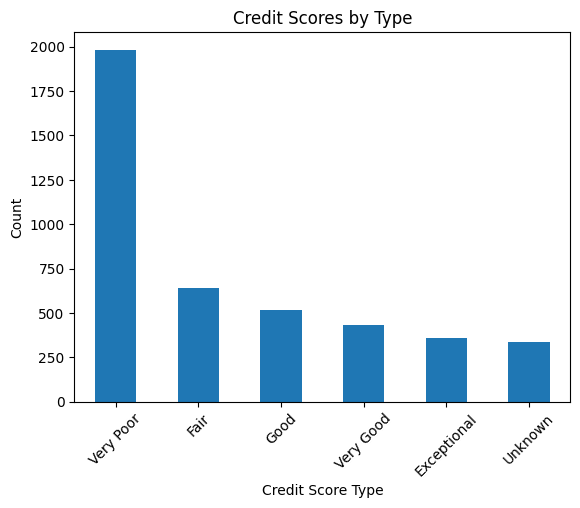

In [73]:
score=df[[' cibil_score']]
plot_credit_scores(score)

In [98]:

def calculate_poverty_levels(data_frame):
    # Define Federal poverty level thresholds based on the number of dependents
    # You can adjust these thresholds based on the latest guidelines
    poverty_levels = {
        1: 12490,
        2: 16910,
        3: 21330,
        4: 25750,
        5: 30170,
        6: 34590,
        7: 39010,
        8: 43430,
        
    }

    # Calculate Federal poverty levels for each row in the DataFrame
    def calculate_poverty_level(row):
        num_dependents = row[' no_of_dependents']
        annual_income = row[' income_annum']
        poverty_level = poverty_levels.get(num_dependents, None)
        if poverty_level is not None:
            return 'Above Poverty Level' if annual_income > poverty_level else 'Below Poverty Level'
        return 'Unknown'

    # Apply the poverty level calculation to the DataFrame
    data_frame['Poverty Level'] = data_frame.apply(calculate_poverty_level, axis=1)

    # Generate a bar plot based on the poverty levels
    poverty_counts = data_frame['Poverty Level'].value_counts()
    poverty_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.xlabel('Poverty Level')
    plt.ylabel('Count')
    plt.title('Poverty Levels')
    plt.xticks(rotation=0)
    plt.show()


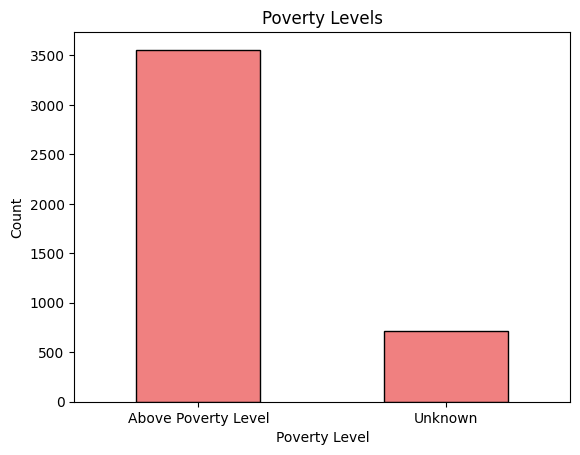

In [99]:
 calculate_poverty_levels(df)

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_poverty_levels(data_frame):
    # Define the Federal poverty level guidelines for different household sizes
    # Replace these values with the actual poverty level guidelines for the current year
    # The values below are for illustrative purposes only
    poverty_levels = {
        1: 12490,
        2: 16910,
        3: 21330,
        4: 25750,
        5: 30170,
        6: 34590,
        7: 39010,
        8: 43430,
        # Add more levels as needed for larger households
    }

    # Calculate the Federal poverty level for each row in the DataFrame
    def calculate_federal_poverty_level(row):
        num_dependents = row[' no_of_dependents']
        annual_income = row[' income_annum']
        poverty_level = poverty_levels.get(num_dependents, 0)
        return annual_income / poverty_level

    # Apply the calculation to the DataFrame
    data_frame['Federal Poverty Level'] = data_frame.apply(calculate_federal_poverty_level, axis=1)
    poverty_counts = data_frame['Federal Poverty Level'].value_counts()

    # Generate a bar plot based on the Federal poverty levels
    #data_frame.plot(kind='bar', x=' no_of_dependents', y='poverty_counts' , color='skyblue', edgecolor='black')
    poverty_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.xlabel('Number of Dependents')
    plt.ylabel('poverty_counts ')
    plt.title('Federal Poverty Levels by Number of Dependents')
    plt.xticks(rotation=0)
    plt.show()


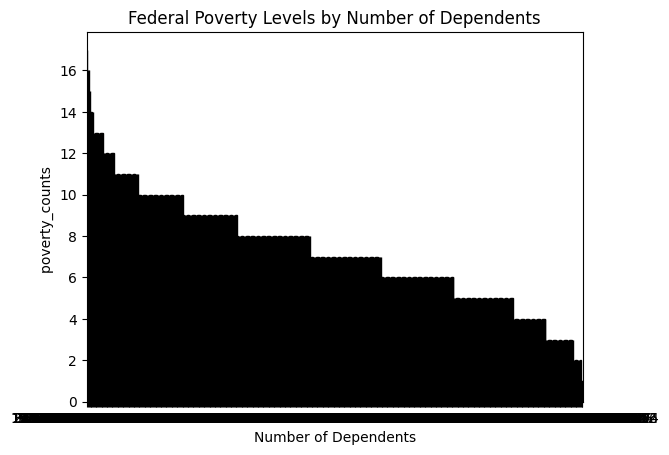

In [160]:
calculate_poverty_levels(df)

#### Question 1

**1.** To begin fill in the format function below with the correct variable.  Notice each **{ }** holds a space where one of your variables will be added to the string.  This will give you something to do while the the function does all the steps you did throughout this lesson.

In [ ]:
a = 'test_score'
b = 'train_score'
c = 'linear model (lm_model)'
d = 'X_train and y_train'
e = 'X_test'
f = 'y_test'
g = 'train and test data sets'
h = 'overfitting'

q1_piat = '''In order to understand how well our {} fit the dataset, 
            we first needed to split our data into {}.  
            Then we were able to fit our {} on the {}.  
            We could then predict using our {}  by providing 
            the linear model the {} for it to make predictions.  
            These predictions were for {}. 

            By looking at the {}, it looked like we were doing awesome because 
            it was 1!  However, looking at the {} suggested our model was not 
            extending well.  The purpose of this notebook will be to see how 
            well we can get our model to extend to new data.
            
            This problem where our data fits the training data well, but does
            not perform well on test data is commonly known as 
            {}.'''.format(a, a, a, a, a, a, a, a, a, a) #replace a with the correct variable

print(q1_piat)

In [ ]:
# Print the solution order of the letters in the format
t.q1_piat_answer()

#### Question 2

**2.** Now, we need to improve the model . Use the dictionary below to provide the true statements about improving **this model**.  **Also consider each statement as a stand alone**.  Though, it might be a good idea after other steps, which would you consider a useful **next step**?

In [ ]:
a = 'yes'
b = 'no'

q2_piat = {'add interactions, quadratics, cubics, and other higher order terms': #letter here, 
           'fit the model many times with different rows, then average the responses': #letter here,
           'subset the features used for fitting the model each time': #letter here,
           'this model is hopeless, we should start over': #letter here}

In [ ]:
#Check your solution
t.q2_piat_check(q2_piat)

##### Question 3

**3.** Before we get too far along, follow the steps in the function below to create the X (explanatory matrix) and y (response vector) to be used in the model.  If your solution is correct, you should see a plot similar to the one shown in the Screencast.

In [ ]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

### Run the Cell Below to Acheive the Results Needed for Question 4

In [ ]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

#### Question 4

**4.** Use the output and above plot to correctly fill in the keys of the **q4_piat** dictionary with the correct variable.  Notice that only the optimal model results are given back in the above - they are stored in **lm_model**, **X_train**, **X_test**, **y_train**, and **y_test**.  If more than one answer holds, provide a tuple holding all the correct variables in the order of first variable alphabetically to last variable alphabetically.

In [ ]:
# Cell for your computations to answer the next question

In [ ]:
a = 'we would likely have a better rsquared for the test data.'
b = 1000
c = 872
d = 0.69
e = 0.82
f = 0.88
g = 0.72
h = 'we would likely have a better rsquared for the training data.'

q4_piat = {'The optimal number of features based on the results is': #letter here, 
               'The model we should implement in practice has a train rsquared of': #letter here, 
               'The model we should implement in practice has a test rsquared of': #letter here,
               'If we were to allow the number of features to continue to increase': #letter here
}

In [ ]:
#Check against your solution
t.q4_piat_check(q4_piat)

#### Question 5

**5.** The default penalty on coefficients using linear regression in sklearn is a ridge (also known as an L2) penalty.  Because of this penalty, and that all the variables were normalized, we can look at the size of the coefficients in the model as an indication of the impact of each variable on the salary.  The larger the coefficient, the larger the expected impact on salary.  

Use the space below to take a look at the coefficients.  Then use the results to provide the **True** or **False** statements based on the data.

#### Run the below to complete the following dictionary

In [ ]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

In [ ]:
a = True
b = False

#According to the data...
q5_piat = {'Country appears to be one of the top indicators for salary': #letter here,
               'Gender appears to be one of the indicators for salary': #letter here, 
               'How long an individual has been programming appears to be one of the top indicators for salary': #letter here,
               'The longer an individual has been programming the more they are likely to earn': #letter here}

In [ ]:
t.q5_piat_check(q5_piat)

#### Congrats of some kind

Congrats!  Hopefully this was a great review, or an eye opening experience about how to put the steps together for an analysis.  List the steps.  In the next lesson, you will look at how take this and show it off to others so they can act on it.